## WCOA 2013 cruise data analysis

In this part of the tutorial, we will go over the basics of working with dates in Pandas and Numpy, make some exploratory plots and start a regression analysis. The data exploration will be largely guided by student interest.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

We use Pandas to import the csv data file. 

Here, there is an optional `parse_dates` argument. The numbers in double brackets `[[8,9]]` indicate which columns to interpret as dates.

In [2]:
filename = 'data/week03_wcoa_cruise/WCOA2013_hy1.csv'
df = pd.read_csv(filename,header=31,na_values=-999,
                 parse_dates=[[8,9]])

In [3]:
df.head()

,DATE_TIME,EXPOCODE,SECT_ID,LEG,LINE,STNNBR,CASTNO,BTLNBR,BTLNBR_FLAG_W,LATITUDE,...,TCARBN,TCARBN_FLAG_W,ALKALI,ALKALI_FLAG_W,PH_TOT,PH_TOT_FLAG_W,PH_TMP,CO32,CO32__FLAG_W,CHLORA
0,2013-08-05 02:12:20,317W20130803,WCOA2013,1,2,11,1,1,2,48.2,...,2370.2,2,2369.0,2,7.294,2,25.0,NaN,9,NaN
1,2013-08-05 02:12:53,317W20130803,WCOA2013,1,2,11,1,2,2,48.2,...,NaN,9,NaN,9,7.295,2,25.0,NaN,9,NaN
2,2013-08-05 02:19:58,317W20130803,WCOA2013,1,2,11,1,3,2,48.2,...,2349.6,2,2343.7,2,7.282,2,25.0,43.521,3,NaN
3,2013-08-05 02:27:01,317W20130803,WCOA2013,1,2,11,1,4,2,48.2,...,2318.7,2,2311.9,2,7.287,2,25.0,45.641,2,NaN
4,2013-08-05 02:30:53,317W20130803,WCOA2013,1,2,11,1,5,2,48.2,...,2300.0,2,2299.7,2,7.308,2,25.0,47.741,2,NaN


Instead of strings, the dates are now in a special `datetime64` format. This means that, instead of treating the dates in the same way as any other collection of characters, pandas and NumPy can understand how this variable represents time.

In [4]:
df['DATE_TIME'].head()

0   2013-08-05 02:12:20
1   2013-08-05 02:12:53
2   2013-08-05 02:19:58
3   2013-08-05 02:27:01
4   2013-08-05 02:30:53
Name: DATE_TIME, dtype: datetime64[ns]

For example, subtracting `datetime64` objects with pandas gives a `Timedelta` object, which is specifically used to represent differences between times. The first two samples in the cruise data are separated by 33 seconds (the time between firing of bottles).

In [5]:
df['DATE_TIME'][1]-df['DATE_TIME'][0]

Timedelta('0 days 00:00:33')

In addition, pyplot automatically understands `datetime64` objects so it is easy to see how the ship moved between stations from north to south as weeks passed.

(array([ 735084.,  735087.,  735090.,  735093.,  735096.,  735099.,
         735102.,  735105.,  735108.]), <a list of 9 Text xticklabel objects>)

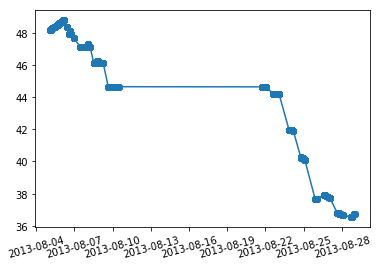

In [6]:
plt.plot(df['DATE_TIME'],df['LATITUDE'],'-o')
plt.xticks(rotation=15)

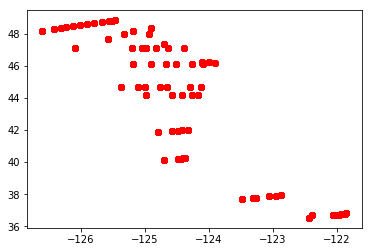

In [7]:
plt.figure()
plt.plot(df['LONGITUDE'], df['LATITUDE'], 'ro')

The `scatter()` function allows points to be colored according to the value of a variable. In the case of dates, later dates are shown as warmer colors.

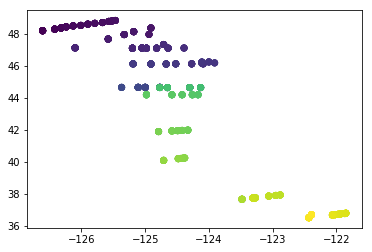

In [8]:
plt.figure()
plt.scatter(df['LONGITUDE'],df['LATITUDE'],c=df['DATE_TIME'])

Note that the vertical coordinate is pressure (not depth, which indicates the bottom depth rather than the depth of the sample). To plot dissolved oxygen with depth:

Text(0,0.5,'pressure[dbar]')

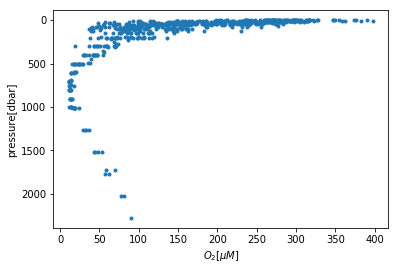

In [9]:
plt.figure()
plt.plot(df['OXYGEN'],df['CTDPRS'],'.')
plt.gca().invert_yaxis()

plt.xlabel('$O_2 [\mu M]$')
plt.ylabel('pressure[dbar]')

Finally, suppose we want to compute the regression of nitrate on phosphate using all of the available data. In theory the slope is given by the "Redfield ratio". 

We can use `stats.linregress`, but this gives us back `NaN` values. This is because there are `NaN` values in the inputs.

In [10]:
x = df['PHSPHT']
y = df['NITRAT']

results = stats.linregress(x,y)
results

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

We can use the `np.finite()` function and create an array of boolean (`True` and `False`) values to select only finite numbers (which does not include `NaN`s).

In [11]:
ii=(np.isfinite(x) & np.isfinite(y))
results=stats.linregress(x[ii],y[ii])
results

LinregressResult(slope=15.447256509328257, intercept=-6.1269014162479678, rvalue=0.98732121974431175, pvalue=0.0, stderr=0.082372778989147466)

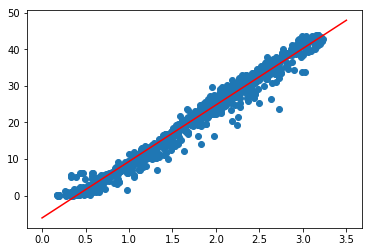

In [12]:
plt.figure()
plt.plot(df['PHSPHT'][ii],df['NITRAT'][ii],'o')
plt.plot(np.array([0,3.5]),results.slope*np.array([0,3.5])+results.intercept,'r-')

#### Execrises

* What scientific questions can be addressed with this data set?
* What relationships might occur between different variables?
* What differences might occur within the same variables, but at different locations or times?
* Create exploratory plots
* Do a correlation and regression analysis. Obtain r and p values. Draw both the regression of $y$ on $x$, and the regression of $x$ on $y$.

In [13]:
df.keys()

Index(['DATE_TIME', 'EXPOCODE', 'SECT_ID', 'LEG', 'LINE', 'STNNBR', 'CASTNO',
       'BTLNBR', 'BTLNBR_FLAG_W', 'LATITUDE', 'LONGITUDE', 'DEPTH', 'CTDPRS',
       'CTDTMP', 'CTDSAL', 'CTDSAL_FLAG_W', 'CTDOXY', 'CTDOXY_FLAG_W',
       'SALNTY', 'SALNTY_FLAG_W', 'OXYGEN', 'OXYGEN_FLAG_W', 'SILCAT',
       'SILCAT_FLAG_W', 'NITRAT', 'NITRAT_FLAG_W', 'NITRIT', 'NITRIT_FLAG_W',
       'PHSPHT', 'PHSPHT_FLAG_W', 'AMMONI', 'AMMONI_FLAG_W', 'TCARBN',
       'TCARBN_FLAG_W', 'ALKALI', 'ALKALI_FLAG_W', 'PH_TOT', 'PH_TOT_FLAG_W',
       'PH_TMP', 'CO32', 'CO32__FLAG_W', 'CHLORA'],
      dtype='object')